In [1]:
import os 
import operator
from collections import Counter

import swifter
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()

np.random.seed = 0

import matplotlib.pyplot as plt

# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 1000)
pd.set_option('display.expand_frame_repr', False)

In [2]:
in_f = '../data/eval1_unlabelled.tsv'
df = pd.read_csv(in_f, sep='\t', header=None, index_col=False)

In [3]:
a = "Spread the coals out and place the grate on the grill. Gently place your salmon burgers in the middle. Cover the grill. For rare burgers, cook for four minutes on each side. To achieve a medium burger, cook for five minutes on each side. For well done burgers, six to seven minutes on each side."

In [4]:
len(a.split())

55

In [5]:
# df.loc[df[0]==110017]

In [6]:
# df['q_len'] = df.iloc[:,1].progress_apply(lambda x: len(x.split()))
# df['a_len'] = df.iloc[:,2].progress_apply(lambda x: len(x.split()))
# df.head()

In [7]:
df['q_len'] = df.iloc[:,1].swifter.apply(lambda x: len(x.split()))
df['a_len'] = df.iloc[:,2].swifter.apply(lambda x: len(x.split()))
# df.head()

Pandas Apply: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104170/104170 [00:00<00:00, 188211.86it/s]


In [16]:
df['t_len'] = df.q_len + df.a_len
df.head()

,0,1,2,3,q_len,a_len,t_len
0,1135787,distance between erie in buffalo new york,"Erie Canal Distance Tables The Erie Canal is the longest canal section in the New York State Canal System. Beginning at lock #E-2 in Waterford, NY, the Erie Canal runs 293 NM (337 SM or 543 KM) to the Niagara River at Tonawanda, NY and from there onto Buffalo, NY and Lake Erie via the Black Rock Canal.",0,7,58,65
1,1135787,distance between erie in buffalo new york,"What is the distance between Erie AND Buffalo? The distance between Erie and Buffalo in a straight line is 87 miles or 139.98 Kilometers . Driving Directions & Drive Times from Erie to Buffalo can be found further down the page. Driving distances, maps and journey times are currently provided by Google mapping systems.",1,7,54,61
2,1135787,distance between erie in buffalo new york,"The distance between Erie and Buffalo in a straight line is 87 miles or 139.98 Kilometers. Driving Directions & Drive Times from Erie to Buffalo can be found further down the page. Driving distances, maps and journey times are currently provided by Google mapping systems.",2,7,45,52
3,1135787,distance between erie in buffalo new york,"Erie Canal Distances. Erie Canal Distance Tables. The Erie Canal is the longest canal section in the New York State Canal System. Beginning at lock #E-2 in Waterford, NY, the Erie Canal runs 293 NM (337 SM or 543 KM) to the Niagara River at Tonawanda, NY and from there onto Buffalo, NY and Lake Erie via the Black Rock Canal. The Erie Canal Distance Table (shown below) provides distances between some of the major points along the length of the canal.",3,7,82,89
4,1135787,distance between erie in buffalo new york,"Erie's Metropolitan Area consists of approximately 280,000 residents and an Urbanized Area population of approximately 195,000. The city is the seat of government for Erie County. Erie is near Cleveland, Ohio; Buffalo, New York; and Pittsburgh, Pennsylvania. Once teeming with heavy industry, Erie's manufacturing sector remains prominent in the local economy, though healthcare, higher education, and tourism are emerging as greater economic drivers.",4,7,63,70


In [9]:
x = Counter(df.q_len.values)
sorted(x.items(), key=operator.itemgetter(0))

[(2, 4580),
 (3, 10800),
 (4, 17180),
 (5, 19220),
 (6, 16940),
 (7, 12680),
 (8, 8570),
 (9, 5810),
 (10, 3250),
 (11, 2100),
 (12, 1260),
 (13, 680),
 (14, 360),
 (15, 290),
 (16, 140),
 (17, 120),
 (18, 40),
 (19, 30),
 (20, 20),
 (21, 20),
 (22, 20),
 (24, 10),
 (25, 40),
 (26, 10)]

In [10]:
avg_q_len = df.q_len.median()
avg_q_len

6.0

In [11]:
x = Counter(df.a_len.values)
sorted(x.items(), key=operator.itemgetter(0))

[(1, 1),
 (2, 2),
 (3, 17),
 (4, 4),
 (6, 6),
 (7, 5),
 (8, 6),
 (9, 29),
 (10, 42),
 (11, 66),
 (12, 88),
 (13, 152),
 (14, 203),
 (15, 205),
 (16, 262),
 (17, 304),
 (18, 306),
 (19, 311),
 (20, 346),
 (21, 364),
 (22, 390),
 (23, 463),
 (24, 492),
 (25, 559),
 (26, 641),
 (27, 755),
 (28, 822),
 (29, 1025),
 (30, 1088),
 (31, 1171),
 (32, 1254),
 (33, 1420),
 (34, 1664),
 (35, 1820),
 (36, 1968),
 (37, 2188),
 (38, 2299),
 (39, 2353),
 (40, 2541),
 (41, 2728),
 (42, 2954),
 (43, 3045),
 (44, 3038),
 (45, 3299),
 (46, 3338),
 (47, 3395),
 (48, 3455),
 (49, 3462),
 (50, 3306),
 (51, 3143),
 (52, 3209),
 (53, 2858),
 (54, 2738),
 (55, 2446),
 (56, 2213),
 (57, 1984),
 (58, 1743),
 (59, 1568),
 (60, 1420),
 (61, 1176),
 (62, 1084),
 (63, 952),
 (64, 882),
 (65, 747),
 (66, 742),
 (67, 693),
 (68, 627),
 (69, 596),
 (70, 539),
 (71, 557),
 (72, 518),
 (73, 529),
 (74, 460),
 (75, 482),
 (76, 444),
 (77, 494),
 (78, 482),
 (79, 443),
 (80, 423),
 (81, 417),
 (82, 367),
 (83, 386),
 (84, 3

In [12]:
avg_a_len = df.a_len.median()
avg_a_len

48.0

In [13]:
x = Counter(df.t_len.values)
sorted(x.items(), key=operator.itemgetter(0))

[(5, 12),
 (6, 3),
 (7, 3),
 (8, 4),
 (9, 2),
 (10, 6),
 (11, 9),
 (12, 12),
 (13, 25),
 (14, 26),
 (15, 49),
 (16, 88),
 (17, 120),
 (18, 181),
 (19, 156),
 (20, 211),
 (21, 246),
 (22, 284),
 (23, 297),
 (24, 309),
 (25, 322),
 (26, 401),
 (27, 393),
 (28, 429),
 (29, 478),
 (30, 551),
 (31, 664),
 (32, 744),
 (33, 828),
 (34, 897),
 (35, 989),
 (36, 1120),
 (37, 1255),
 (38, 1375),
 (39, 1486),
 (40, 1660),
 (41, 1855),
 (42, 1979),
 (43, 2110),
 (44, 2257),
 (45, 2366),
 (46, 2533),
 (47, 2631),
 (48, 2940),
 (49, 3027),
 (50, 3123),
 (51, 3079),
 (52, 3241),
 (53, 3192),
 (54, 3209),
 (55, 3186),
 (56, 3186),
 (57, 3046),
 (58, 2937),
 (59, 2701),
 (60, 2620),
 (61, 2397),
 (62, 2147),
 (63, 1966),
 (64, 1739),
 (65, 1557),
 (66, 1458),
 (67, 1290),
 (68, 1221),
 (69, 1010),
 (70, 947),
 (71, 858),
 (72, 758),
 (73, 735),
 (74, 695),
 (75, 631),
 (76, 597),
 (77, 566),
 (78, 507),
 (79, 522),
 (80, 514),
 (81, 456),
 (82, 501),
 (83, 435),
 (84, 445),
 (85, 466),
 (86, 418),
 (87,

In [14]:
avg_t_len = df.t_len.median()
avg_t_len

54.0

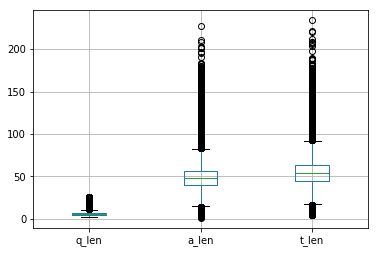

In [15]:
df.boxplot(column=['q_len', 'a_len', 't_len'])
plt.show()